In [ ]:
# pip install kagglehub

In [ ]:
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("athota1/caltech101")
# print("Path to dataset files:", path)

Path to dataset files: C:\Users\Saif\.cache\kagglehub\datasets\athota1\caltech101\versions\1


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Model
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rescale=1.0/255 , validation_split=0.25)

In [3]:
import os
dataset_dir ='C:/Users/rishi/Downloads/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img'
print(os.listdir(dataset_dir))

['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 's

In [4]:
tg = datagen.flow_from_directory(dataset_dir, target_size=(64,64), batch_size=2000, class_mode='categorical', subset='training')
vg = datagen.flow_from_directory(dataset_dir, target_size=(64,64), batch_size=2000, class_mode='categorical', subset='validation')

Found 6903 images belonging to 102 classes.
Found 2241 images belonging to 102 classes.


In [5]:
help(datagen)

Help on ImageDataGenerator in module keras.src.legacy.preprocessing.image object:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range

In [6]:
from keras.applications import VGG16

In [7]:
help(VGG16)

Help on function VGG16 in module keras.src.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='vgg16')
    Instantiates the VGG16 model.

    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)

    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).

    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).

    The default input size for this model is 224x224.

    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the model.
    `vgg16.preproc

In [49]:
tg[0][0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.09803922, 0.37647063, 0.5411765 ],
         [0.09803922, 0.36862746, 0.5294118 ],
         [0.09803922, 0.37254903, 0.5137255 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.09803922, 0.37647063, 0.5411765 ],
         [0.10196079, 0.37254903, 0.53333336],
         [0.10196079, 0.37254903, 0.5254902 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.09803922, 0.37647063, 0.5411765 ],
         [0.09803922, 0.37647063, 0.5411765 ],
         [0.09803922, 0.3803922 , 0.5294118 ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [8]:
x_train , y_train = tg[0]
x_test, y_test = vg[0]

In [9]:
x_train.shape

(2000, 64, 64, 3)

In [10]:
y_train.shape

(2000, 102)

In [11]:
base_model = VGG16(include_top=False, weights="C:/Users/rishi/Downloads/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", input_shape=(64,64,3))

In [13]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
for layers in base_model.layers:
    layers.trainable = False

In [15]:
print(tg.class_indices)

{'BACKGROUND_Google': 0, 'Faces': 1, 'Faces_easy': 2, 'Leopards': 3, 'Motorbikes': 4, 'accordion': 5, 'airplanes': 6, 'anchor': 7, 'ant': 8, 'barrel': 9, 'bass': 10, 'beaver': 11, 'binocular': 12, 'bonsai': 13, 'brain': 14, 'brontosaurus': 15, 'buddha': 16, 'butterfly': 17, 'camera': 18, 'cannon': 19, 'car_side': 20, 'ceiling_fan': 21, 'cellphone': 22, 'chair': 23, 'chandelier': 24, 'cougar_body': 25, 'cougar_face': 26, 'crab': 27, 'crayfish': 28, 'crocodile': 29, 'crocodile_head': 30, 'cup': 31, 'dalmatian': 32, 'dollar_bill': 33, 'dolphin': 34, 'dragonfly': 35, 'electric_guitar': 36, 'elephant': 37, 'emu': 38, 'euphonium': 39, 'ewer': 40, 'ferry': 41, 'flamingo': 42, 'flamingo_head': 43, 'garfield': 44, 'gerenuk': 45, 'gramophone': 46, 'grand_piano': 47, 'hawksbill': 48, 'headphone': 49, 'hedgehog': 50, 'helicopter': 51, 'ibis': 52, 'inline_skate': 53, 'joshua_tree': 54, 'kangaroo': 55, 'ketch': 56, 'lamp': 57, 'laptop': 58, 'llama': 59, 'lobster': 60, 'lotus': 61, 'mandolin': 62, 'm

In [26]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(90, activation='relu')(x)
pred = Dense(102, activation='softmax')(x)

In [27]:
model = Model(inputs=base_model.input, outputs=pred)

In [28]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 90)             │         5,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 102)            │         9,282 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,860,956 (56.69 MB)

 Trainable params: 146,268 (571.36 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary

<bound method Model.summary of <Functional name=functional_1, built=True>>

In [31]:
x_test.shape

(2000, 64, 64, 3)

In [32]:
y_test.shape

(2000, 102)

In [33]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 642ms/step - accuracy: 0.1432 - loss: 4.1756 - val_accuracy: 0.3200 - val_loss: 3.2488
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 709ms/step - accuracy: 0.3552 - loss: 2.9907 - val_accuracy: 0.4090 - val_loss: 2.7415
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 629ms/step - accuracy: 0.4755 - loss: 2.3016 - val_accuracy: 0.4755 - val_loss: 2.3448
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.5743 - loss: 1.8202 - val_accuracy: 0.5110 - val_loss: 2.1534
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 623ms/step - accuracy: 0.6337 - loss: 1.4835 - val_accuracy: 0.5275 - val_loss: 2.0727
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 731ms/step - accuracy: 0.7092 - loss: 1.2136 - val_accuracy: 0.5240 - val_loss: 2.0345
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 656ms/step - accuracy: 0.7611 - loss: 0.9917 - val_accuracy: 0.5530 - val_loss: 1.9637
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 677ms/step - accuracy: 0.7973 - loss: 0.8471 - val_accu

In [37]:
for layer in base_model.layers[-4:]:
    layer.trainable=True

In [42]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dense(90, activation='relu')(x)
x = Dropout(0.1)(x)
pred = Dense(102, activation='softmax')(x)

In [43]:
model = Model(inputs=base_model.input, outputs = pred)

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
hn=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 980ms/step - accuracy: 0.1278 - loss: 4.2415 - val_accuracy: 0.3295 - val_loss: 3.2664
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 835ms/step - accuracy: 0.3088 - loss: 3.3302 - val_accuracy: 0.3235 - val_loss: 3.0902
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 841ms/step - accuracy: 0.3401 - loss: 3.0105 - val_accuracy: 0.4000 - val_loss: 2.7975
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 855ms/step - accuracy: 0.4129 - loss: 2.5908 - val_accuracy: 0.4370 - val_loss: 2.5838
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 786ms/step - accuracy: 0.4562 - loss: 2.2348 - val_accuracy: 0.4540 - val_loss: 2.4550
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 813ms/step - accuracy: 0.5087 - loss: 2.0535 - val_accuracy: 0.4800 - val_loss: 2.4532
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 886ms/step - accuracy: 0.5795 - loss: 1.6986 - val_accuracy: 0.5075 - val_loss: 2.3632
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 943ms/step - accuracy: 0.6305 - loss: 1.4299 - val_accu

In [46]:
import numpy as np

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 332ms/step
predicted: Motorbikes
actual: Motorbikes


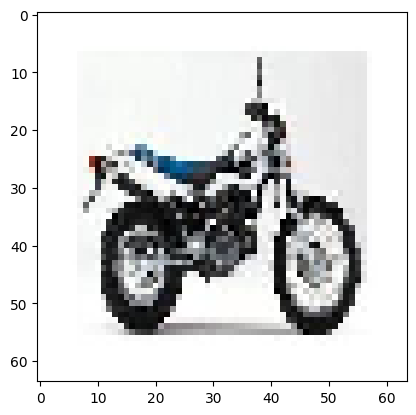

In [53]:
pred_value=model.predict(x_test)
labels=list(vg.class_indices.keys())
n=4
plt.imshow(x_test[n])
print("predicted:",labels[np.argmax(pred_value[n])])
print("actual:",labels[np.argmax(y_test[n])])